In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from funciones_toolbox import *

Se prueba generar un dataset sintético, pero se acabo descartando por problemas con los umbrales y la cardinalidad.

In [3]:
np.random.seed(42)

n = 1000

df = pd.DataFrame({
    "coste": np.random.normal(3000, 1200, n),          # target continuo
    "edad": np.random.normal(18, 80, n),                 # numérica continua
    "IMC": np.random.randint(4, 27, n),                  # numérica discreta
    "fumador": np.random.choice(["Yes", "No"], n),            # binaria
    "provincia": np.random.choice(
        ["Lleida", "Barcelona", "Girona", "Tarragona"], n),                           # categórica
    "niños": np.random.normal(0, 4, n)                     # sin correlación
})

# Introducimos nulos
df.loc[np.random.choice(df.index, 10, replace=False), "edad"] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), "provincia"] = np.nan

df.head(40)

,coste,edad,IMC,fumador,provincia,niños
0,3596.056984,129.948435,9,Yes,Barcelona,4.894841
1,2834.082839,91.970695,14,Yes,Girona,-4.699365
2,3777.226246,22.770430,6,Yes,Girona,5.703579
3,4827.635828,-33.754942,11,Yes,Tarragona,-2.316181
4,2719.015950,73.857865,6,No,Lleida,-9.025000
5,2719.035652,49.478831,17,Yes,Girona,-4.713761
6,4895.055379,89.615458,16,Yes,Barcelona,0.872100
7,3920.921675,68.813744,16,Yes,Girona,-3.915257
8,2436.630737,101.964217,5,No,Tarragona,-0.352178
9,3651.072052,-24.818817,16,No,Lleida,1.353010


Finalmente se prueba con un dataset real.

In [2]:
df_real = pd.read_csv("obligatoria_hard.csv", sep="|")
df_real

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [6]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# Test describe_df(df) 20/01/26 20:40

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error   

## Reglas particulares

### Inputs

[X] Recibe un DataFrame  
[X] Falla correctamente si no es DataFrame

### Outputs

[X] Devuelve un DataFrame  
[X] Columnas = variables del df original

[X] Filas incluyen:
 - [X] Tipo de variable
 - [X] % de nulos
 - [X] Nº valores únicos
 - [X] % cardinalidad

### Validaciones

[X] El tipo detectado coincide con pandas
[X] El % de nulos es correcto
[X] La cardinalidad está bien calculada


In [7]:
print("TEST describe_df")
describe_df(df_real)

TEST describe_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,504,26,76,2,81,446,356,412,9,66,46,455,229
CARDIN (%),99.6,5.14,15.02,0.4,16.01,88.14,70.36,81.42,1.78,13.04,9.09,89.92,45.26


##### Comprobación porcentaje nulos

In [8]:
df_real.isna().sum() / len(df_real) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

##### Comprobación valores únicos

In [9]:
df_real.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

##### Comprobación cardinalidad

In [10]:
(df_real.nunique() / len(df_real)) * 100

CRIM       99.604743
ZN          5.138340
INDUS      15.019763
CHAS        0.395257
NOX        16.007905
RM         88.142292
AGE        70.355731
DIS        81.422925
RAD         1.778656
TAX        13.043478
PTRATIO     9.090909
LSTAT      89.920949
MEDV       45.256917
dtype: float64

##### Error dataframe

In [3]:
describe_df("esto no es un dataframe")

Debes introducir un pandas DataFrame válido.


# Test tipifica_variables(df, umbral_categoria, umbral_continua)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

## Reglas particulares

### Inputs

[X] `df` DataFrame  
[X] ``umbral_categoria`` (int)  
[X] `umbral_continua` (float)  

### Outputs

[X] Devuelve un DataFrame  
[X] Columnas = "nombre_variable", "tipo_sugerido" 
[X] Tantas filas como columnas del df  

### Lógica correcta

[X] Cardinalidad = 2 -> **Binaria**  
[X] Cardinalidad < umbral_categoria -> **Categórica**  
[X] Cardinalidad >= umbral_categoria y % >= umbral_continua -> **Numérica continua**  
[X] Else -> Numérica Discreta

### Validaciones

[X] Funciona con columnas numéricas y categóricas  
[X] Maneja valores nulos  
[X] No rompe con umbrales raros



In [3]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_categoria=10, umbral_continua=0.5))

TEST tipifica_variables
   nombre_variable      tipo_sugerido
0             CRIM  Numerica Continua
1               ZN  Numerica Discreta
2            INDUS  Numerica Discreta
3             CHAS            Binaria
4              NOX  Numerica Discreta
5               RM  Numerica Continua
6              AGE  Numerica Continua
7              DIS  Numerica Continua
8              RAD         Categórica
9              TAX  Numerica Discreta
10         PTRATIO  Numerica Discreta
11           LSTAT  Numerica Continua
12            MEDV  Numerica Discreta


##### Error dataframe

In [4]:
print("TEST tipifica_variables")
print(tipifica_variables("sandra", umbral_categoria=10, umbral_continua=0.5))

TEST tipifica_variables


TypeError: El argumento 'df' debe ser un DF

##### Comprobación umbrales raros

In [5]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_categoria=10, umbral_continua=-10000))

TEST tipifica_variables


ValueError: 'umbral_continua' debe ser mayor que 0

In [6]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_categoria=100000, umbral_continua=10))

TEST tipifica_variables
   nombre_variable tipo_sugerido
0             CRIM    Categórica
1               ZN    Categórica
2            INDUS    Categórica
3             CHAS       Binaria
4              NOX    Categórica
5               RM    Categórica
6              AGE    Categórica
7              DIS    Categórica
8              RAD    Categórica
9              TAX    Categórica
10         PTRATIO    Categórica
11           LSTAT    Categórica
12            MEDV    Categórica


In [7]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_categoria=-50000, umbral_continua=100))

TEST tipifica_variables


ValueError: 'umbral_categoria' debe ser mayor que 0.

In [8]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_categoria=1, umbral_continua=10000))

TEST tipifica_variables
   nombre_variable      tipo_sugerido
0             CRIM  Numerica Discreta
1               ZN  Numerica Discreta
2            INDUS  Numerica Discreta
3             CHAS            Binaria
4              NOX  Numerica Discreta
5               RM  Numerica Discreta
6              AGE  Numerica Discreta
7              DIS  Numerica Discreta
8              RAD  Numerica Discreta
9              TAX  Numerica Discreta
10         PTRATIO  Numerica Discreta
11           LSTAT  Numerica Discreta
12            MEDV  Numerica Discreta


##### Comprobación argumentos cambiados

In [10]:
print("TEST tipifica_variables")
print(tipifica_variables(df_real, umbral_continua=0.5, umbral_categoria=10))


TEST tipifica_variables
   nombre_variable      tipo_sugerido
0             CRIM  Numerica Continua
1               ZN  Numerica Discreta
2            INDUS  Numerica Discreta
3             CHAS            Binaria
4              NOX  Numerica Discreta
5               RM  Numerica Continua
6              AGE  Numerica Continua
7              DIS  Numerica Continua
8              RAD         Categórica
9              TAX  Numerica Discreta
10         PTRATIO  Numerica Discreta
11           LSTAT  Numerica Continua
12            MEDV  Numerica Discreta


# Test get_features_num_regression(df, target_col, umbral_corr, pvalue=None)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[X] `df` DataFrame  
[X] ``target_col``existe
[X] ``target_col`` es num cont (target)  
[X] `umbral_corr` (float, 0-1)  
[X] ``pvalue`` = None

### Outputs

[X] Lista strings  
[X] Solo columnas numéricas  
[X] No incluye target

### Lógica

[X] Lista columnas num |correlación| > umbral_corr  
[X] If pvalue $\neq$ None -> aplica test hipótesis  
[X] Nivel significación correcto (1 - pvalue)

### Errores

[X] Devuelve None si algo no cumple  
[X] Imprimir mensaje 



In [11]:
print("TEST get_features_num_regression")

get_features_num_regression(
    df_real,
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=0.05
)

TEST get_features_num_regression


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

##### Error dataframe

In [14]:
print("TEST get_features_num_regression")
get_features_num_regression(
    "lucia",
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=0.05)

TEST get_features_num_regression
df debe ser un pandas.DataFrame.


##### Error target

In [12]:
get_features_num_regression(df_real, "no_existe", 0.5)
get_features_num_regression(df_real, "RAD", 0.5)

target_col debe ser el nombre (str) de una columna existente del DataFrame.
target_col no parece una variable de regresión (baja cardinalidad).


##### Error umbral

In [16]:
get_features_num_regression(df_real, target_col="MEDV", umbral_corr=5, pvalue=0.05)

umbral_corr debe ser un número entre 0 y 1.


##### Error pvalue

In [19]:
get_features_num_regression(df_real, target_col="MEDV", umbral_corr=0.5, pvalue=17)

pvalue debe ser None o un número entre 0 y 1.


# Test plot_features_num_regression(df, target_col, columns, umbral_corr, pvalue=None)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[X] `df` DataFrame  
[X] ``target_col`` es ""  
[X] ``columns`` = []  
[X] `umbral_corr` = 0  
[X] ``pvalue`` = None

### Comportamiento

[X] Si `columns` vacía -> usa numéricas  
[X] Filtra si |correlación| > umbral_corr   
[X] Aplica test si pvalue $\neq$ None  
[X] Devuelve lista de columnas válidas

### Plots

[X] Pairplots 
[X] Target siempre aparece  
[X] No rompe con muchas columnas  
[X] (Extra) Divide en grupos de <= 5

### Errores

[X] Devuelve None y printa error 
[X] Maneja inputs incorrectos


TEST plot_features_num_regression


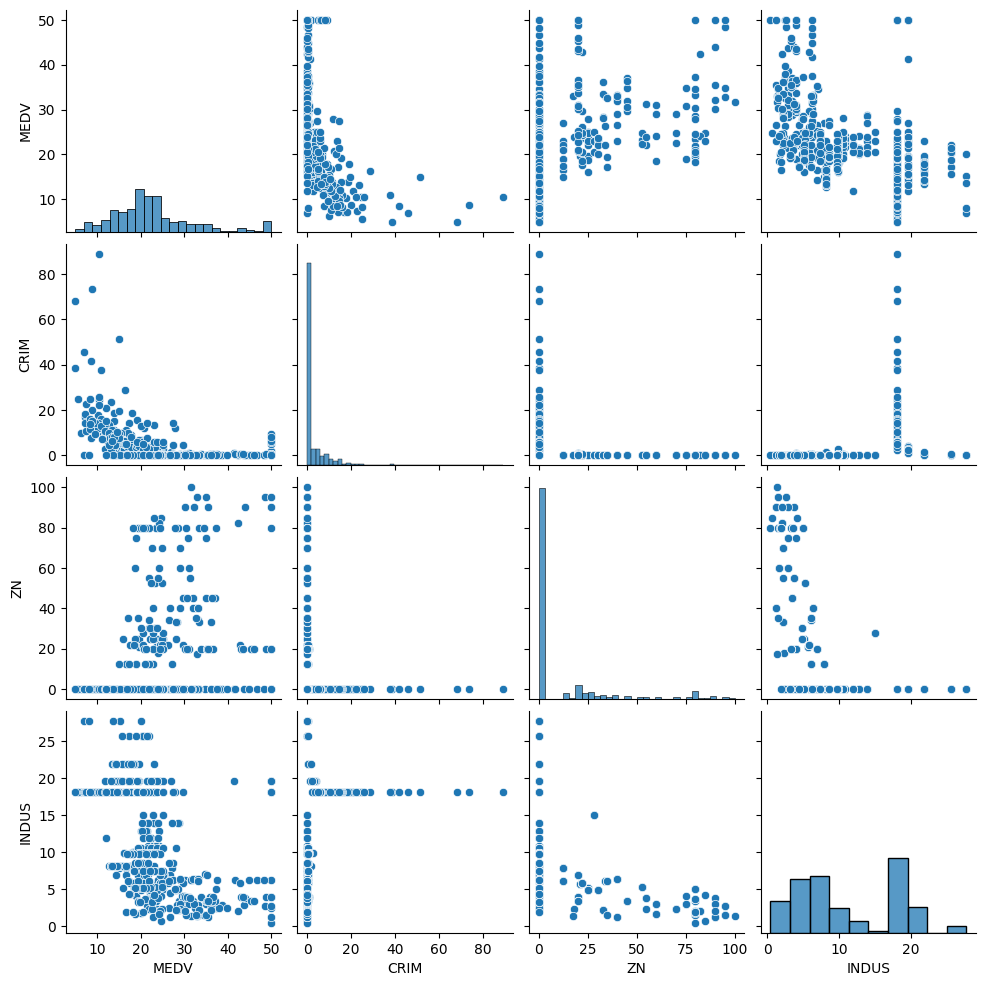

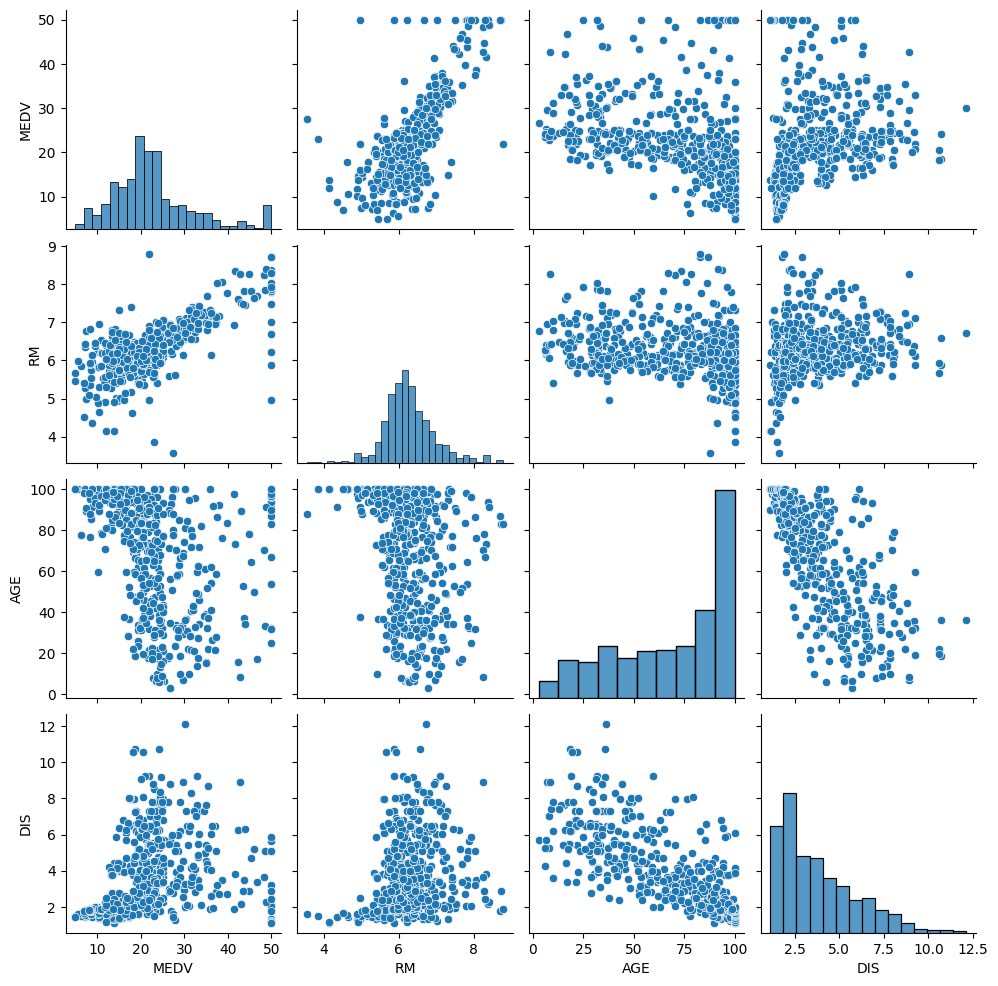

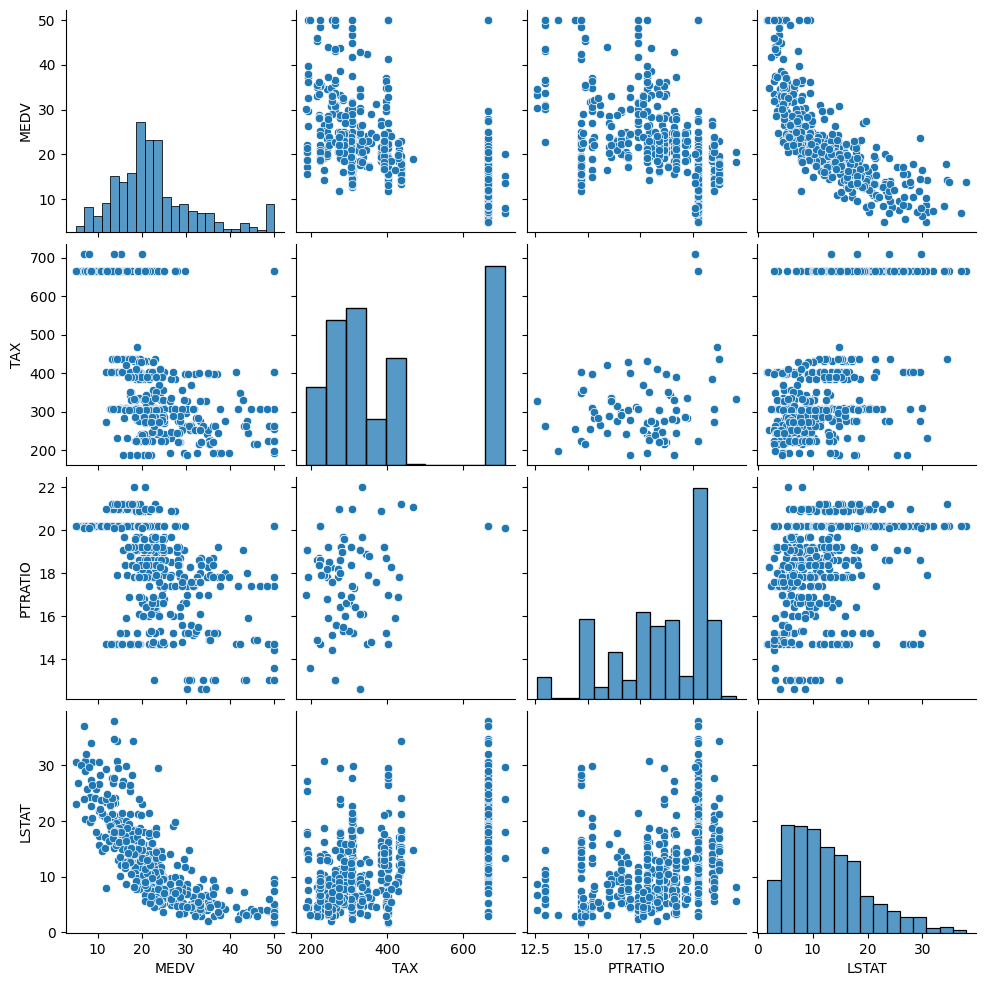

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [12]:
print("TEST plot_features_num_regression")

plot_features_num_regression(
    df_real,
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=0.1
)


##### Comprobación columna

Validacion de inputs terminada, podemos seguir...


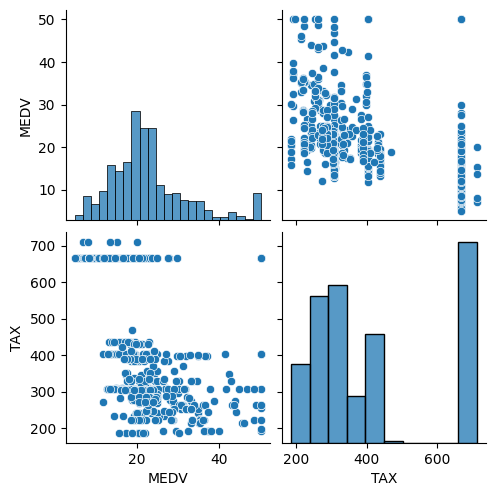

In [13]:
plot_features_num_regression(
    df_real,
    target_col="MEDV",
    columns=["TAX"],
    umbral_corr=0.2,
    pvalue=0.1
)

##### Error dataframe

In [31]:
plot_features_num_regression(
    "paco",
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=0.1
)

df debe ser un pandas.DataFrame.
Error: la función get_features_num_regression ha detectado valores de entrada no válidos


##### Error umbral

In [33]:
plot_features_num_regression(
    df_real,
    target_col="MEDV",
    umbral_corr=2,
    pvalue=0.1
)

umbral_corr debe ser un número entre 0 y 1.
Error: la función get_features_num_regression ha detectado valores de entrada no válidos


##### Error p-value

In [35]:
plot_features_num_regression(
    df_real,
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=3
)

pvalue debe ser None o un número entre 0 y 1.
Error: la función get_features_num_regression ha detectado valores de entrada no válidos


# Test get_features_cat_regression(df, target_col, pvalue=0.05)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[X] `df` DataFrame  
[X] ``target_col``existe
[X] ``target_col`` es num cont o disc con alta cardinalidad (target)   
[X] ``pvalue`` = 0.05

### Outputs

[X] Lista columnas categóricas  

### Lógica

[X] Elige test estadístico correcto  
[X] Filtra por significación estadística   
[X] No incluye variables numéricas  

### Errores

[X] Devuelve None si algo no cumple  
[X] Imprimir mensaje explicativo


In [14]:
print("TEST get_features_cat_regression")

get_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=0.05
)


TEST get_features_cat_regression
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']


['RAD']

##### Error dataframe

In [42]:
get_features_cat_regression(
    "sergi",
    target_col="MEDV",
    pvalue=0.05
)

TypeError: El argumento 'df' debe ser un DF

##### Correlación consigo misma

In [15]:
get_features_cat_regression(
    df_real,
    target_col="RAD",
    pvalue=0.05
)

Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: infp-value: 0.0 con un IC del 0.95

Nuestras features válidas son: ['RAD']


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


['RAD']

##### Error value

In [46]:
get_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=5
)

ERROR #6: El pvalue introducido no esta entre los valores marcados (0 - 1). Porfavor vuelva a repetirlo.


##### Error target

In [47]:
get_features_cat_regression(
    df_real,
    target_col="provincia",
    pvalue=0.05
)

ERROR #2: Su target no se encuentra entre las columnas del dataframe.
Validacion de inputs terminada, podemos seguir...


KeyError: 'provincia'

# Test plot_features_cat_regression(df, target_col, columns, pvalue = 0.05, with_individual_plot = False)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[X] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[X] `df` DataFrame  
[X] ``target_col`` es ""  
[X] ``columns`` = []   
[X] ``pvalue`` = 0.05
[X] ``with_individual_plot`` = False 

### Comportamiento

[X] Si `columns` vacía -> usa categóricas  
[X] Filtra si por test estadístico |correlación| > umbral_corr   
[X] Devuelve lista de columnas válidas
[ ] Gráfico si `columns` rellenada por usuario

### Plots

[X] Histogramas agrupados por categoría   
[X] Gráficos legibles  
[X] Opción ``with_individual_plot` funciona  
[X] (Extra) Divide en grupos de <= 5  

### Errores

[X] Error Dataframe  
[X] Error target no existe  
[X] Error target no numérico  
[X] Error columna no existe  
[X] Error p value numérico  
[X] Error p value intervalo  
[X] Error individual plot  


TEST plot_features_cat_regression (sense columnas)
OK, Dataframe y target.
pvalue es OK
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
columnas validas que se encuentran en el Dataframe: ['RAD']
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
Relacion de MEDV con RAD:



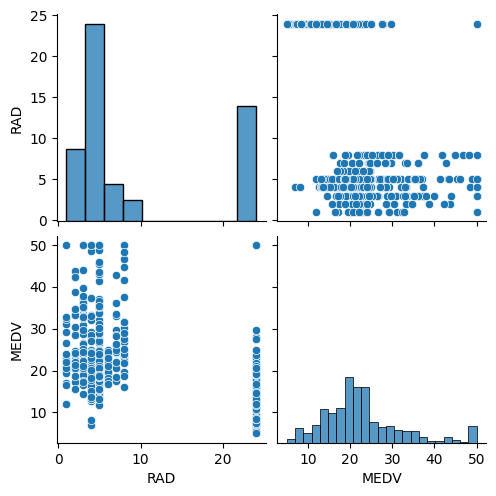

['RAD']

In [9]:
print("TEST plot_features_cat_regression (sense columnas)")

plot_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)

##### Comprovación Dataframe

In [7]:
features_cat_plot = plot_features_cat_regression(
    "esto no es un dataframe",
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)

features_cat_plot

ERROR #1: El grupo de datos que debemos de analizar no es considerado un DataFrame, por favor introduzca un DataFrame.


##### Comprovación target existe

In [11]:
plot_features_cat_regression(
    df_real,
    target_col="money",
    pvalue=0.05,
    with_individual_plot=True
)


ERROR #2: Su target no se encuentra entre las columnas del dataframe.
pvalue es OK
ERROR #2: Su target no se encuentra entre las columnas del dataframe.
Validacion de inputs terminada, podemos seguir...


KeyError: 'money'

##### Comprobación columnas

TEST plot_features_cat_regression (amb columnes)
OK, Dataframe y target.
pvalue es OK
columnas validas que se encuentran en el Dataframe: ['TAX']
Para la columna TAX, su rtdo es: Stat: 5.075518246130149p-value: 1.3348325232784219e-25 con un IC del 0.95

Nuestras features válidas son: ['TAX']
Relacion de MEDV con TAX:



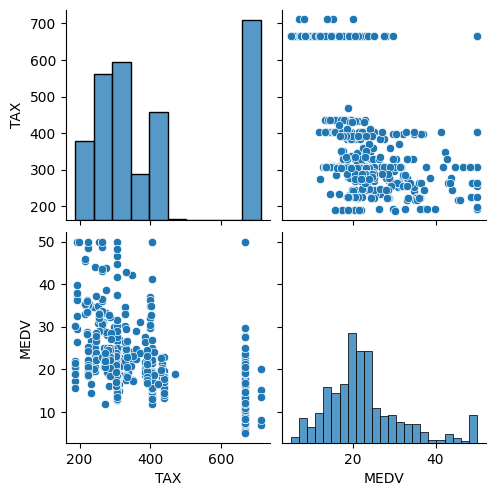

['TAX']

In [10]:
print("TEST plot_features_cat_regression (amb columnes)")

plot_features_cat_regression(
    df_real,
    columns = ["TAX"],
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)

In [18]:
plot_features_cat_regression(
    df_real,
    columns = 7,
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)

OK, Dataframe y target.
pvalue es OK
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
ERROR #7: La columna introducida no es tipo string


In [19]:
plot_features_cat_regression(
    df_real,
    columns = "fumador",
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)



OK, Dataframe y target.
pvalue es OK
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
ERROR #4: Las columnas: ['f'], no se encuentra en tu DataFrame.


##### Comprovación p-value

In [16]:
plot_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue="no número",
    with_individual_plot=True
)

OK, Dataframe y target.
ERROR #5: El pvalue introducido es erroneo, por favor, introduzca un numero.


##### Comprobación p-value >1

In [ ]:
plot_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=-0.05,
    with_individual_plot=True
)


OK, Dataframe y target.
ERROR #6: El pvalue introducido no esta entre los valores marcados (0 - 1). Porfavor vuelva a repetirlo.


In [18]:
plot_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=2,
    with_individual_plot=True
)

OK, Dataframe y target.
ERROR #6: El pvalue introducido no esta entre los valores marcados (0 - 1). Porfavor vuelva a repetirlo.


# Test integral

                  CRIM       ZN    INDUS     CHAS      NOX       RM      AGE  \
DATA_TYPE      float64  float64  float64  float64  float64  float64  float64   
MISSINGS (%)       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
UNIQUE_VALUES      504       26       76        2       81      446      356   
CARDIN (%)        99.6     5.14    15.02      0.4    16.01    88.14    70.36   

                   DIS      RAD      TAX  PTRATIO    LSTAT     MEDV  
DATA_TYPE      float64  float64  float64  float64  float64  float64  
MISSINGS (%)       0.0      0.0      0.0      0.0      0.0      0.0  
UNIQUE_VALUES      412        9       66       46      455      229  
CARDIN (%)       81.42     1.78    13.04     9.09    89.92    45.26  
   nombre_variable      tipo_sugerido
0             CRIM  Numerica Continua
1               ZN  Numerica Discreta
2            INDUS  Numerica Discreta
3             CHAS            Binaria
4              NOX  Numerica Discreta
5               RM  N

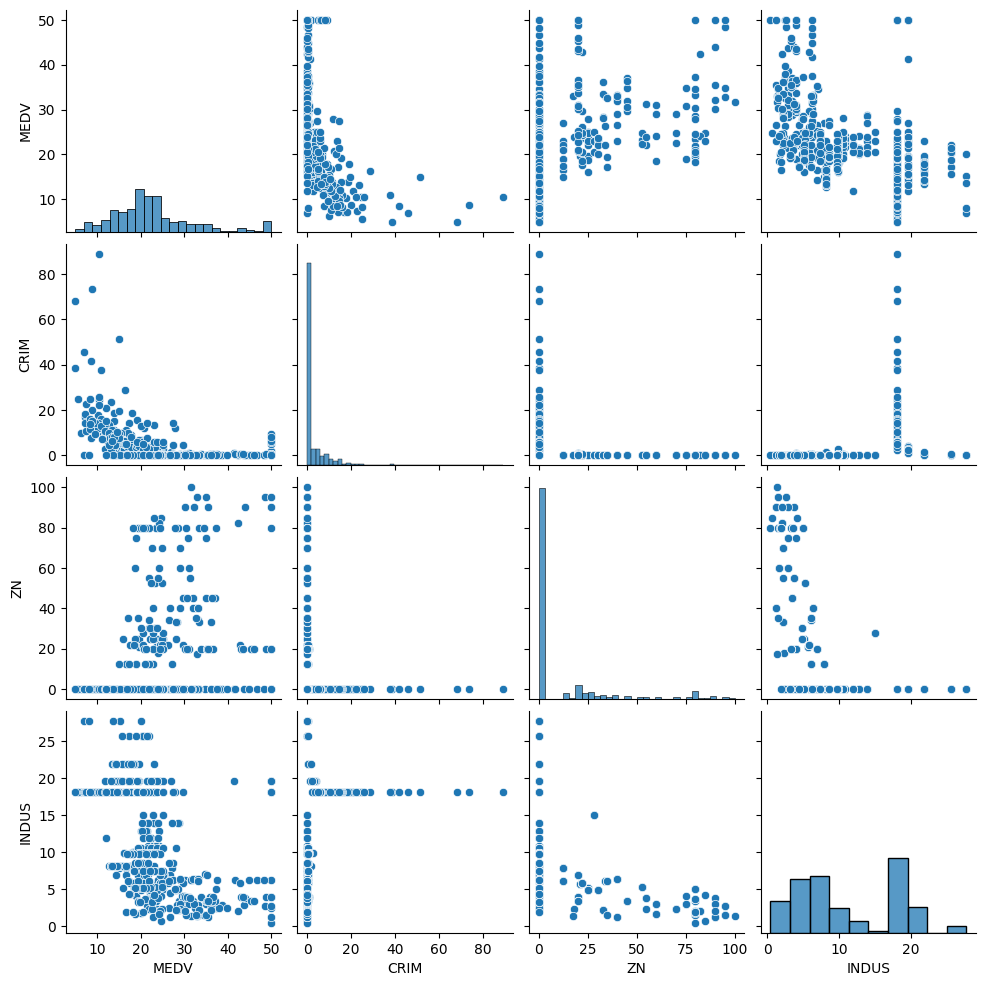

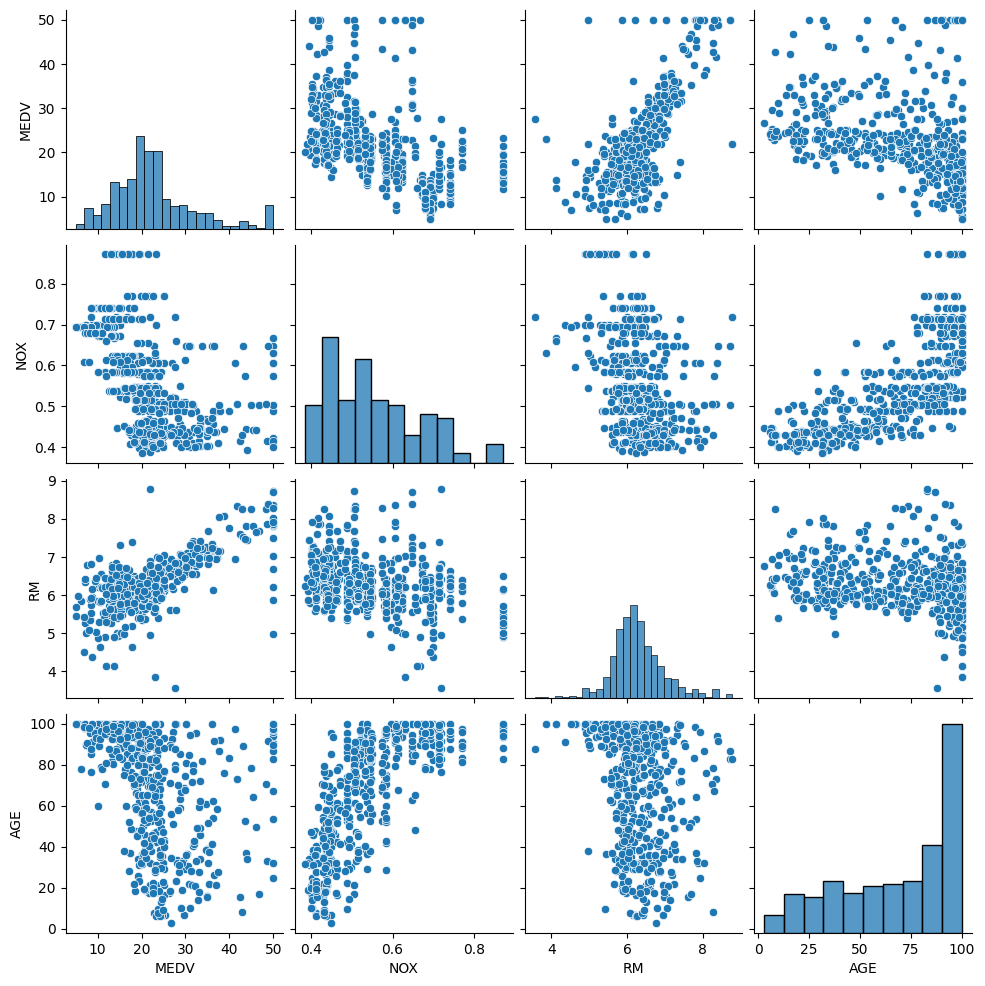

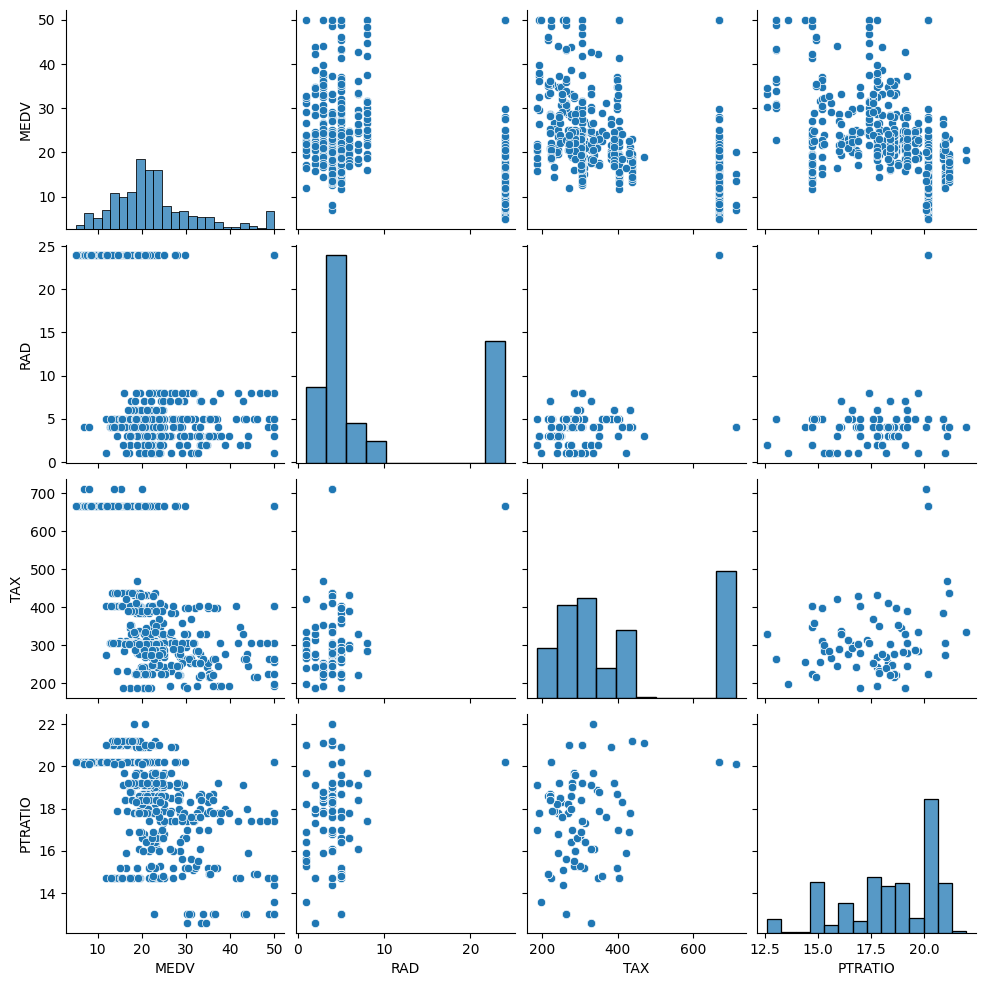

OK, Dataframe y target.
pvalue es OK
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
columnas validas que se encuentran en el Dataframe: ['RAD']
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']
Relacion de MEDV con ['RAD']:



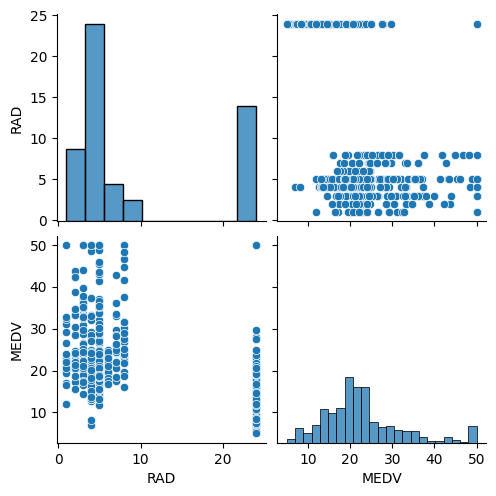

['RAD']

In [18]:
print(describe_df(df_real))

print(tipifica_variables(df_real, 10, 0.5))

get_features_num_regression(df_real, target_col="MEDV", umbral_corr=0.2)
get_features_cat_regression(df_real, target_col="MEDV")

plot_features_num_regression(df_real, target_col="MEDV")
plot_features_cat_regression(df_real, target_col="MEDV")